In [57]:
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
#Kappa à plus de deux graders || kappa de fleiss
from statsmodels.stats.inter_rater import fleiss_kappa
from statsmodels.stats.inter_rater import aggregate_raters


# Kappa inter-humains (José, Julien, Sébastien, Chloé)

In [58]:
#Récupération des données
dataJulien = pd.read_csv("SousCorpusMessagesJulien.csv",encoding='latin-1')
dataJose = pd.read_csv("SousCorpusMessagesJose.csv",encoding='latin-1')
dataChloe = pd.read_csv("SousCorpusMessagesChloe.csv",encoding='latin-1')
dataSebastien = pd.read_csv("SousCorpusMessagesSebastien.csv",encoding='latin-1')
dataJulien.head(2)

,ï»¿messageID,user,role,message,groupID,fileID,date,time,seanceID,Forme,Contenu,Nature
0,24,145797.0,Driver,tu pense si je fais un for in in range avec un...,4,1db9dee2-2702-457f-aa07-6b60589446ce,2024-10-09,04:25:31,1,Question,Mots clefs python,Demande d'aide
1,30,200807.0,Navigator,"en vrai c'est pas mieux de faire un ""if len(a)...",4,1db9dee2-2702-457f-aa07-6b60589446ce,2024-10-09,04:28:50,1,Explication,Mots clefs python,Informations sur comment proceder


In [59]:
dataJulien.columns

Index(['ï»¿messageID', 'user', 'role', 'message', 'groupID', 'fileID', 'date',
       'time', 'seanceID', 'Forme', 'Contenu', 'Nature'],
      dtype='object')

In [60]:
dataJulien['Forme']

0        Question
1     Explication
2     Description
3      Correction
4      Correction
5      Validation
6        Question
7     Description
8           Autre
9     Explication
10    Instruction
11    Explication
12     Validation
13    Explication
14    Explication
15       Question
16     Validation
17    Explication
18    Explication
19     Validation
20    Instruction
21       Question
22    Instruction
23          Autre
24    Explication
25    Instruction
26    Explication
27    Instruction
28    Instruction
29    Explication
30    Description
31    Explication
32    Description
33       Question
34          Autre
35    Explication
36    Explication
37    Description
38    Explication
39    Explication
40    Instruction
41    Explication
42       Question
43    Explication
44          Autre
45    Instruction
46    Explication
47    Instruction
Name: Forme, dtype: object

In [61]:
dataChloe.head(3)

,ï»¿messageID,user,role,message,groupID,fileID,date,time,seanceID,Forme ( du contenu ),Contenu,Nature,Forme v2 ( 3 valeurs ),Forme v2 (4 valeurs),Forme v3,Unnamed: 15,Contenu v2
0,24,145797.0,Driver,tu pense si je fais un for in in range avec un...,4,1db9dee2-2702-457f-aa07-6b60589446ce,2024-10-09,04:25:31,1,Question,Mots clefs python,Demande d'aide,instruction,instruction,instruction,NaN,relatedToProgramming_relatedToTask
1,30,200807.0,Navigator,"en vrai c'est pas mieux de faire un ""if len(a)...",4,1db9dee2-2702-457f-aa07-6b60589446ce,2024-10-09,04:28:50,1,Question,Mots clefs python,Informations sur comment proceder,instruction,instruction,instruction,NaN,relatedToProgramming_relatedToTask
2,34,200807.0,Navigator,quand je teste le code il me disent y'a des er...,4,1db9dee2-2702-457f-aa07-6b60589446ce,2024-10-09,04:30:08,1,Description,Concepts cles de programmation,"Erreurs, idees fausses",explication,explication,explication,NaN,relatedToProgramming_relatedToTask


In [62]:
dataJulien["Forme"].to_numpy()


array(['Question', 'Explication', 'Description', 'Correction',
       'Correction', 'Validation', 'Question', 'Description', 'Autre',
       'Explication', 'Instruction', 'Explication', 'Validation',
       'Explication', 'Explication', 'Question', 'Validation',
       'Explication', 'Explication', 'Validation', 'Instruction',
       'Question', 'Instruction', 'Autre', 'Explication', 'Instruction',
       'Explication', 'Instruction', 'Instruction', 'Explication',
       'Description', 'Explication', 'Description', 'Question', 'Autre',
       'Explication', 'Explication', 'Description', 'Explication',
       'Explication', 'Instruction', 'Explication', 'Question',
       'Explication', 'Autre', 'Instruction', 'Explication',
       'Instruction'], dtype=object)

In [63]:
dataChloe["Forme ( du contenu )"].to_numpy()

array(['Question', 'Question', 'Description', 'Correction', 'Correction',
       'Validation', 'Question', 'Instruction', 'Description',
       'Instruction', 'Instruction', 'Instruction', 'Validation',
       'Instruction', 'Instruction', 'Question', 'Question',
       'Explication', 'Instruction', 'Autre', 'Instruction', 'Correction',
       'Correction', 'Description', 'Instruction', 'Instruction',
       'Correction', 'Instruction', 'Instruction', 'Instruction',
       'Description', 'Description', 'Instruction', 'Question',
       'Description', 'Validation', 'Description', 'Correction',
       'Instruction', 'Instruction', 'Instruction', 'Instruction',
       'Explication', 'Instruction', 'Instruction', 'Instruction',
       'Correction', 'Instruction'], dtype=object)

In [64]:
#Kappa deux à deux avec la librairie
noms = ["Julien-Chloe","Julien-Jose","Jose-Chloe","Jose-Sebastien","Sebastien-Julien","Sebastien-Chloe"]

score_forme = []
score_forme.append(cohen_kappa_score(dataJulien['Forme'].to_numpy(),dataChloe['Forme ( du contenu )'].to_numpy()))
score_forme.append(cohen_kappa_score(dataJulien['Forme'].to_numpy(),dataJose['Forme'].to_numpy()))
score_forme.append(cohen_kappa_score(dataJose['Forme'].to_numpy(),dataChloe['Forme ( du contenu )'].to_numpy()))
score_forme.append(cohen_kappa_score(dataJose['Forme'].to_numpy(),dataSebastien['Forme'].to_numpy()))
score_forme.append(cohen_kappa_score(dataSebastien['Forme'].to_numpy(),dataJulien['Forme'].to_numpy()))
score_forme.append(cohen_kappa_score(dataSebastien['Forme'].to_numpy(),dataChloe['Forme ( du contenu )'].to_numpy()))

score_contenu=[]
score_contenu.append(cohen_kappa_score(dataJulien['Contenu'].to_numpy(),dataChloe['Contenu'].to_numpy()))
score_contenu.append(cohen_kappa_score(dataJulien['Contenu'].to_numpy(),dataJose['Contenu'].to_numpy()))
score_contenu.append(cohen_kappa_score(dataJose['Contenu'].to_numpy(),dataChloe['Contenu'].to_numpy()))
score_contenu.append(cohen_kappa_score(dataJose['Contenu'].to_numpy(),dataSebastien['Contenu'].to_numpy()))
score_contenu.append(cohen_kappa_score(dataSebastien['Contenu'].to_numpy(),dataJulien['Contenu'].to_numpy()))
score_contenu.append(cohen_kappa_score(dataSebastien['Contenu'].to_numpy(),dataChloe['Contenu'].to_numpy()))

score_nature = []
score_nature.append(cohen_kappa_score(dataJulien['Nature'].to_numpy(),dataChloe['Nature'].to_numpy()))
score_nature.append(cohen_kappa_score(dataJulien['Nature'].to_numpy(),dataJose['Nature'].to_numpy()))
score_nature.append(cohen_kappa_score(dataJose['Nature'].to_numpy(),dataChloe['Nature'].to_numpy()))
score_nature.append(cohen_kappa_score(dataJose['Nature'].to_numpy(),dataSebastien['Nature'].to_numpy()))
score_nature.append(cohen_kappa_score(dataSebastien['Nature'].to_numpy(),dataJulien['Nature'].to_numpy()))
score_nature.append(cohen_kappa_score(dataSebastien['Nature'].to_numpy(),dataChloe['Nature'].to_numpy()))

score_forme,score_contenu,score_nature

([np.float64(0.29304215337734896),
  np.float64(0.38587512794268175),
  np.float64(0.5268346111719606),
  np.float64(0.4453781512605043),
  np.float64(0.415282392026578),
  np.float64(0.41214057507987223)],
 [np.float64(0.32155477031802115),
  np.float64(0.5054545454545454),
  np.float64(0.4070588235294117),
  np.float64(0.23010487353485487),
  np.float64(0.21786360893180456),
  np.float64(0.23684210526315785)],
 [np.float64(0.4491803278688524),
  np.float64(0.45127925966249316),
  np.float64(0.6867862969004894),
  np.float64(0.4025974025974026),
  np.float64(0.3344425956738769),
  np.float64(0.5218594355285002)])

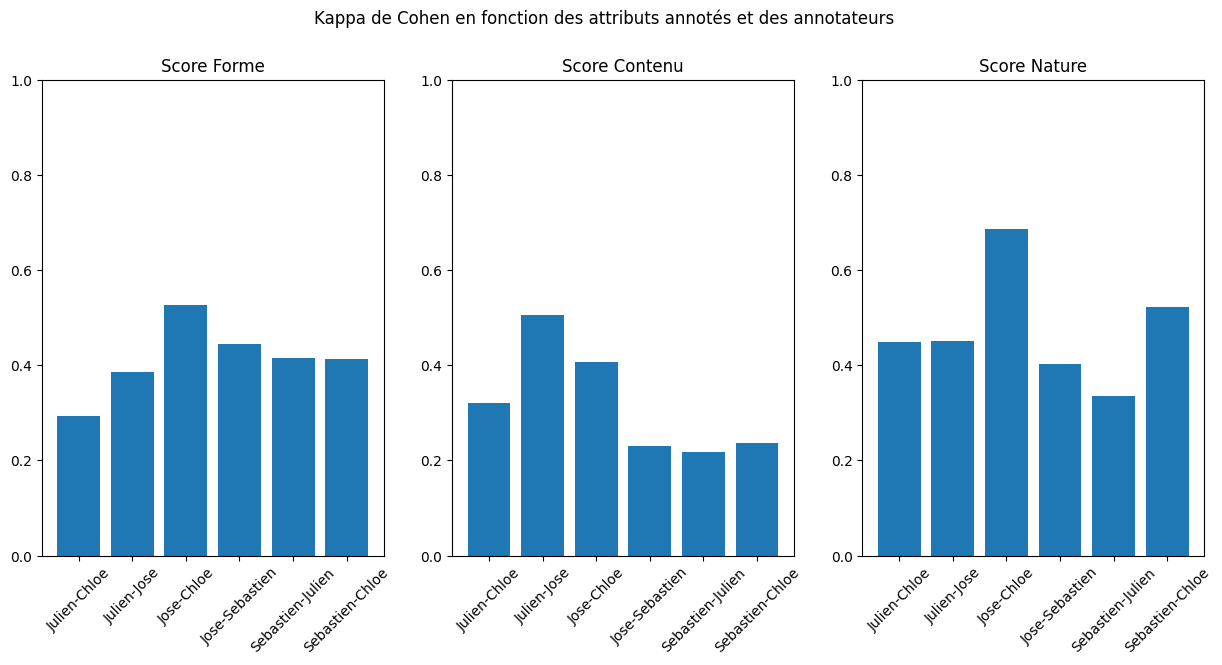

In [65]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3)
f.set_figheight(7)
f.set_figwidth(15)
f.subplots_adjust(bottom=0.2)

ax1.bar(noms, score_forme)
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title('Score Forme')  # Title for first subplot
ax1.set_ylim([0,1])

ax2.bar(noms, score_contenu)
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_title('Score Contenu')  # Title for second subplot
ax2.set_ylim([0,1])

ax3.bar(noms, score_nature)
ax3.tick_params(axis='x', labelrotation=45)
ax3.set_title('Score Nature')  # Title for third subplot
ax3.set_ylim([0,1])
f.suptitle("Kappa de Cohen en fonction des attributs annotés et des annotateurs")
plt.show()

In [66]:
agreg_forme = aggregate_raters(np.array([dataJulien['Forme'].to_numpy(),dataChloe['Forme ( du contenu )'].to_numpy(),dataJose['Forme'].to_numpy(),dataSebastien['Forme'].to_numpy()]).transpose())
multi_score_forme = fleiss_kappa(agreg_forme[0])

agreg_contenu = aggregate_raters(np.array([dataJulien['Contenu'].to_numpy(),dataChloe['Contenu'].to_numpy(),dataJose['Contenu'].to_numpy(),dataSebastien['Contenu'].to_numpy()]).transpose())
multi_score_contenu = fleiss_kappa(agreg_contenu[0])

agreg_nature = aggregate_raters(np.array([dataJulien['Nature'].to_numpy(),dataChloe['Nature'].to_numpy(),dataJose['Nature'].to_numpy(),dataSebastien['Nature'].to_numpy()]).transpose())
multi_score_nature = fleiss_kappa(agreg_nature[0])

multi_score_forme,multi_score_contenu,multi_score_nature

(np.float64(0.402391508800215),
 np.float64(0.30888638920134986),
 np.float64(0.47201979925752796))

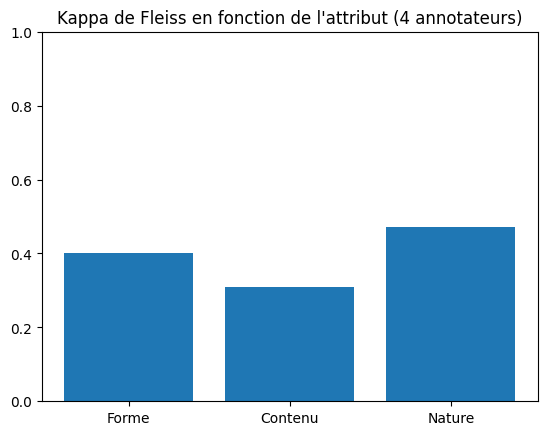

In [67]:
plt.bar(["Forme","Contenu","Nature"],[multi_score_forme,multi_score_contenu,multi_score_nature])

plt.title("Kappa de Fleiss en fonction de l'attribut (4 annotateurs)")
plt.ylim([0,1])
plt.show()

## Tests avec moins de valeurs pour forme

In [68]:
print("3 attributs : " + str(cohen_kappa_score(dataJose['Forme v2 ( 3 valeurs )'].to_numpy(),dataChloe['Forme v2 ( 3 valeurs )'].to_numpy())))

3 attributs : 0.5675675675675675


In [69]:
print("4 attributs : " + str(cohen_kappa_score(dataJose['Forme v2 (4 valeurs)'].to_numpy(),dataChloe['Forme v2 (4 valeurs)'].to_numpy())))

4 attributs : 0.4600000000000001


## Avec attribut "autre"

In [70]:
print("3 attributs + autre : " + str(cohen_kappa_score(dataJose['Forme v3'].to_numpy(),dataChloe['Forme v3'].to_numpy())))

3 attributs + autre : 0.5025906735751295


## Calcul avec les nouveaux attributs pour forme et contenu

In [111]:
dataJulien = pd.read_csv("SousCorpusMessagesJulien.csv",encoding='latin-1')
dataJose = pd.read_csv("SousCorpusMessagesJose.csv",encoding='latin-1')
dataChloe = pd.read_csv("SousCorpusMessagesChloe.csv",encoding='latin-1')
dataSebastien = pd.read_csv("SousCorpusMessagesSebastien.csv",encoding='latin-1')

In [112]:
dataSebastien['Forme v2 ( 3 valeurs )'].to_numpy() #oublis de sebastien

array(['none', 'explication', 'explication', 'explication', 'instruction',
       'validation', 'none', 'explication', 'explication', 'instruction',
       'instruction', 'explication', 'validation', 'instruction',
       'instruction', 'none', 'explication', 'explication', 'instruction',
       'validation', 'explication', 'instruction', 'instruction',
       'instruction', 'instruction', 'instruction', 'explication',
       'instruction', 'instruction', 'instruction', 'explication',
       'explication', 'explication', 'explication', 'explication',
       'validation', 'explication', 'explication', 'explication',
       'instruction', 'instruction', 'explication', 'explication',
       'explication', 'instruction', 'instruction', 'explication',
       'instruction'], dtype=object)

In [113]:
noms = ["Jose-Chloe","Jose-Sebastien","Sebastien-Chloe"]

score_forme = []
score_forme.append(cohen_kappa_score(dataJose['Forme v2 ( 3 valeurs )'].to_numpy(),dataChloe['Forme v2 ( 3 valeurs )'].to_numpy()))
score_forme.append(cohen_kappa_score(dataJose['Forme v2 ( 3 valeurs )'].to_numpy(),dataSebastien['Forme v2 ( 3 valeurs )'].to_numpy()))
score_forme.append(cohen_kappa_score(dataSebastien['Forme v2 ( 3 valeurs )'].to_numpy(),dataChloe['Forme v2 ( 3 valeurs )'].to_numpy()))

score_contenu = []
score_contenu.append(cohen_kappa_score(dataJose['Contenu v2'].to_numpy(),dataChloe['Contenu v2'].to_numpy()))
score_contenu.append(cohen_kappa_score(dataJose['Contenu v2'].to_numpy(),dataSebastien['Contenu v2'].to_numpy()))
score_contenu.append(cohen_kappa_score(dataSebastien['Contenu v2'].to_numpy(),dataChloe['Contenu v2'].to_numpy()))


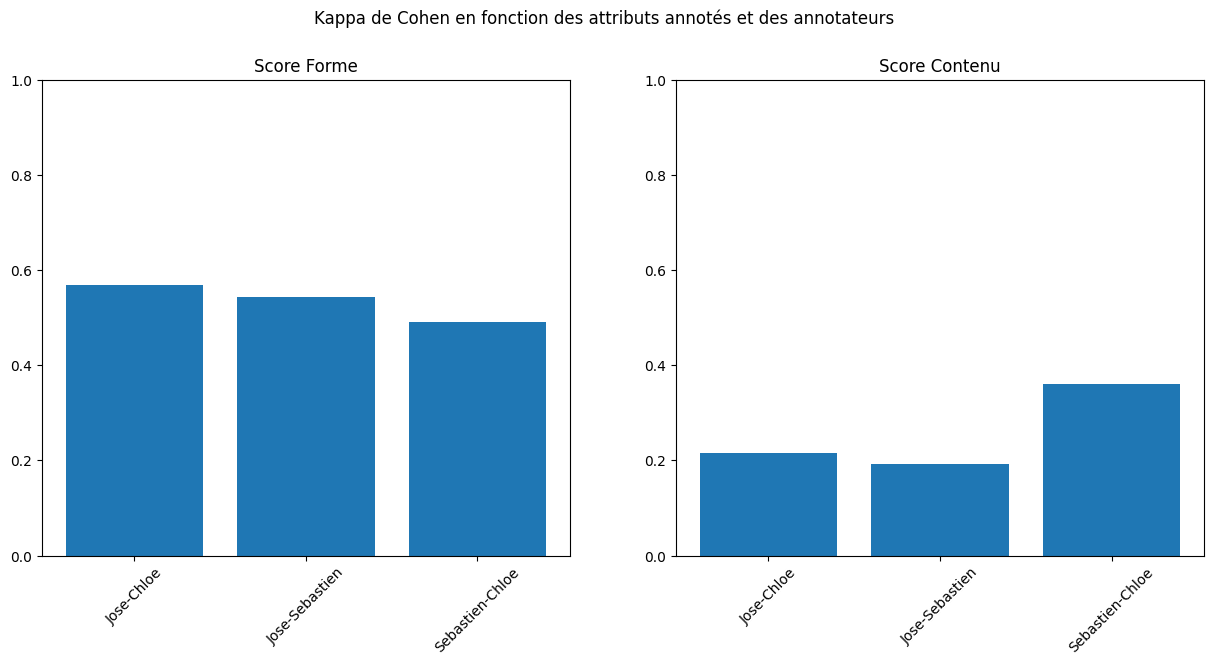

In [114]:
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figheight(7)
f.set_figwidth(15)
f.subplots_adjust(bottom=0.2)

ax1.bar(noms, score_forme)
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title('Score Forme')  # Title for first subplot
ax1.set_ylim([0,1])

ax2.bar(noms, score_contenu)
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_title('Score Contenu')  # Title for second subplot
ax2.set_ylim([0,1])

f.suptitle("Kappa de Cohen en fonction des attributs annotés et des annotateurs")
plt.show()

In [115]:
agreg_forme = aggregate_raters(np.array([dataChloe['Forme v2 ( 3 valeurs )'].to_numpy(),dataJose['Forme v2 ( 3 valeurs )'].to_numpy(),dataSebastien['Forme v2 ( 3 valeurs )'].to_numpy()]).transpose())
multi_score_forme = fleiss_kappa(agreg_forme[0])

agreg_contenu = aggregate_raters(np.array([dataChloe['Contenu v2'].to_numpy(),dataJose['Contenu v2'].to_numpy(),dataSebastien['Contenu v2'].to_numpy()]).transpose())
multi_score_contenu = fleiss_kappa(agreg_contenu[0])

multi_score_forme,multi_score_contenu

(np.float64(0.5302560756809657), np.float64(0.15855572998430142))

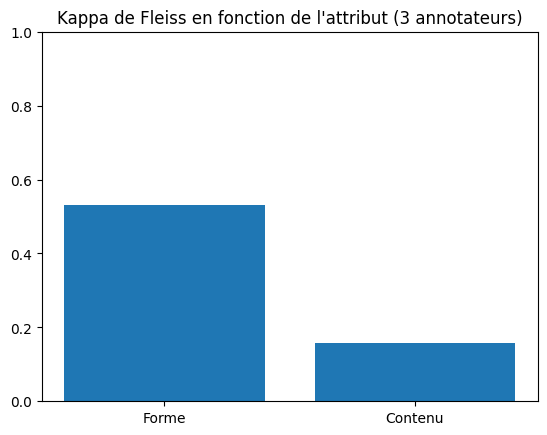

In [116]:
plt.bar(["Forme","Contenu"],[multi_score_forme,multi_score_contenu])

plt.title("Kappa de Fleiss en fonction de l'attribut (3 annotateurs)")
plt.ylim([0,1])
plt.show()

In [117]:
#Kappa deux à deux avec la librairie
noms = ["Julien-Chloe","Julien-Jose","Jose-Chloe","Jose-Sebastien","Sebastien-Julien","Sebastien-Chloe"]

score_forme = []
score_forme.append(cohen_kappa_score(dataJulien['Forme v2 ( 3 valeurs )'].to_numpy(),dataChloe['Forme v2 ( 3 valeurs )'].to_numpy()))
score_forme.append(cohen_kappa_score(dataJulien['Forme v2 ( 3 valeurs )'].to_numpy(),dataJose['Forme v2 ( 3 valeurs )'].to_numpy()))
score_forme.append(cohen_kappa_score(dataJose['Forme v2 ( 3 valeurs )'].to_numpy(),dataChloe['Forme v2 ( 3 valeurs )'].to_numpy()))
score_forme.append(cohen_kappa_score(dataJose['Forme v2 ( 3 valeurs )'].to_numpy(),dataSebastien['Forme v2 ( 3 valeurs )'].to_numpy()))
score_forme.append(cohen_kappa_score(dataSebastien['Forme v2 ( 3 valeurs )'].to_numpy(),dataJulien['Forme v2 ( 3 valeurs )'].to_numpy()))
score_forme.append(cohen_kappa_score(dataSebastien['Forme v2 ( 3 valeurs )'].to_numpy(),dataChloe['Forme v2 ( 3 valeurs )'].to_numpy()))

score_contenu=[]
score_contenu.append(cohen_kappa_score(dataJulien['Contenu v2'].to_numpy(),dataChloe['Contenu v2'].to_numpy()))
score_contenu.append(cohen_kappa_score(dataJulien['Contenu v2'].to_numpy(),dataJose['Contenu v2'].to_numpy()))
score_contenu.append(cohen_kappa_score(dataJose['Contenu v2'].to_numpy(),dataChloe['Contenu v2'].to_numpy()))
score_contenu.append(cohen_kappa_score(dataJose['Contenu v2'].to_numpy(),dataSebastien['Contenu v2'].to_numpy()))
score_contenu.append(cohen_kappa_score(dataSebastien['Contenu v2'].to_numpy(),dataJulien['Contenu v2'].to_numpy()))
score_contenu.append(cohen_kappa_score(dataSebastien['Contenu v2'].to_numpy(),dataChloe['Contenu v2'].to_numpy()))

score_forme,score_contenu,score_nature

([np.float64(0.2941176470588235),
  np.float64(0.2930232558139535),
  np.float64(0.5675675675675675),
  np.float64(0.5428571428571429),
  np.float64(0.33479212253829327),
  np.float64(0.49044585987261147)],
 [np.float64(0.4864197530864197),
  np.float64(0.22128487994808566),
  np.float64(0.21549636803874084),
  np.float64(0.191515907673113),
  np.float64(0.4457274826789839),
  np.float64(0.36131013306038884)],
 [np.float64(0.4491803278688524),
  np.float64(0.45127925966249316),
  np.float64(0.6867862969004894),
  np.float64(0.4025974025974026),
  np.float64(0.3344425956738769),
  np.float64(0.5218594355285002)])

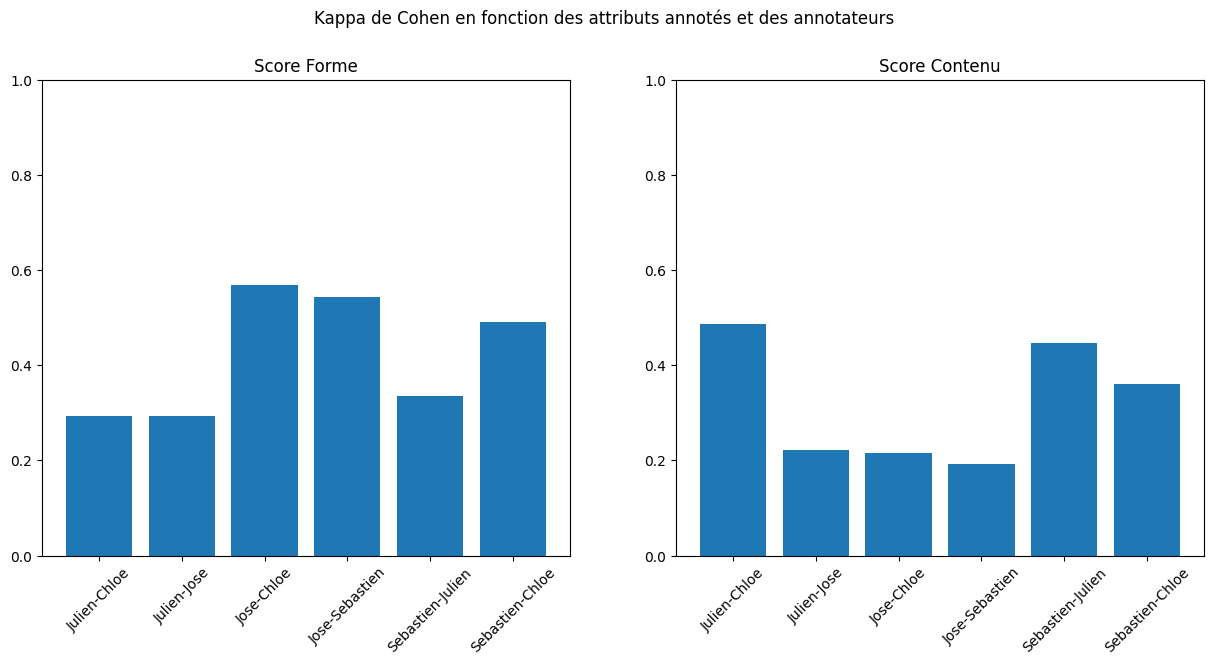

In [118]:
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figheight(7)
f.set_figwidth(15)
f.subplots_adjust(bottom=0.2)

ax1.bar(noms, score_forme)
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title('Score Forme')  # Title for first subplot
ax1.set_ylim([0,1])

ax2.bar(noms, score_contenu)
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_title('Score Contenu')  # Title for second subplot
ax2.set_ylim([0,1])

f.suptitle("Kappa de Cohen en fonction des attributs annotés et des annotateurs")
plt.show()

In [119]:
agreg_forme = aggregate_raters(np.array([dataJulien['Forme v2 ( 3 valeurs )'].to_numpy(),dataChloe['Forme v2 ( 3 valeurs )'].to_numpy(),dataJose['Forme v2 ( 3 valeurs )'].to_numpy(),dataSebastien['Forme v2 ( 3 valeurs )'].to_numpy()]).transpose())
multi_score_forme = fleiss_kappa(agreg_forme[0])

agreg_contenu = aggregate_raters(np.array([dataJulien['Contenu v2'].to_numpy(),dataChloe['Contenu v2'].to_numpy(),dataJose['Contenu v2'].to_numpy(),dataSebastien['Contenu v2'].to_numpy()]).transpose())
multi_score_contenu = fleiss_kappa(agreg_contenu[0])

multi_score_forme,multi_score_contenu

(np.float64(0.412626309446556), np.float64(0.25776522791448164))

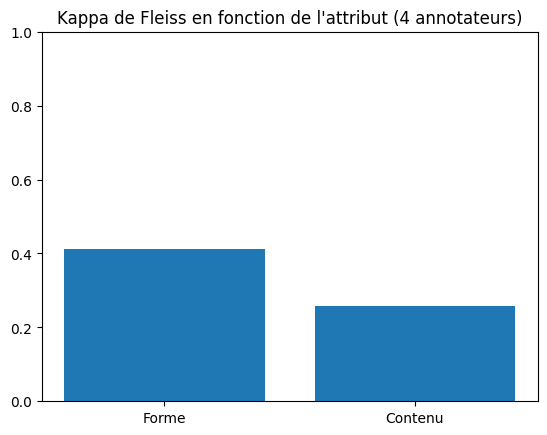

In [121]:
plt.bar(["Forme","Contenu"],[multi_score_forme,multi_score_contenu])

plt.title("Kappa de Fleiss en fonction de l'attribut (4 annotateurs)")
plt.ylim([0,1])
plt.show()

# Classification humain-LLM : 25 messages, calcul pour le rapport de stage

In [77]:
annotated = pd.read_csv("classified_by_hand.csv",encoding='latin-1',index_col = 0)
notAnnotated = pd.read_csv("classified_test.csv",encoding='latin-1',index_col=0)
annotated.head(2)

,seance_ID,groupe_ID,role,messageID,utterance_num,message,forme,ton,content,nature
0,np.int64(1),np.int64(4),Driver,22,0,Bonjour,positiveSentence,positiveTone,notRelatedToProgramming_Other,noFeedback
1,np.int64(1),np.int64(4),Navigator,23,0,Bonjour,positiveSentence,positiveTone,notRelatedToProgramming_Other,noFeedback


In [78]:
notAnnotated.head(2)

,seance_ID,groupe_ID,role,messageID,utterance_num,message,forme,ton,content,nature
0,1,0,Navigator,0,0,"Tu es qui ,",question,positiveTone,notRelatedToProgramming_Other,noFeedback
1,1,0,Navigator,1,0,On se met 5 partout ok ?,question,positiveTone,notRelatedToProgramming_Other,noFeedback


In [79]:
cols = ['forme','content','nature']
scores = []
for col in cols:
    scores.append(cohen_kappa_score(annotated[col],notAnnotated[col]))
scores   

ValueError: Found input variables with inconsistent numbers of samples: [25, 47]

Nan pour ton est sûrement dû au fait qu'il n'y ait qu'une catégorie.

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (0,).

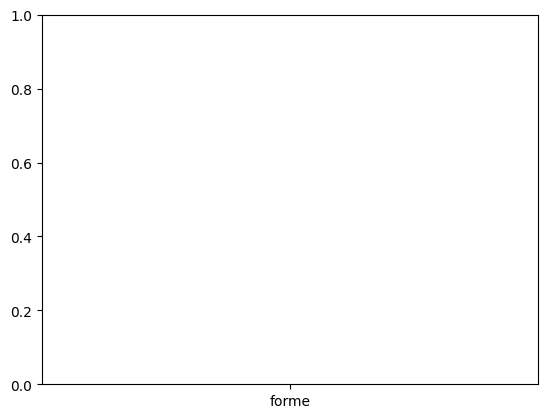

In [ ]:
plt.bar(cols,scores)
plt.ylim([0,1])
plt.plot()

### Matrices de contingence

In [ ]:
from sklearn.metrics.cluster import contingency_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

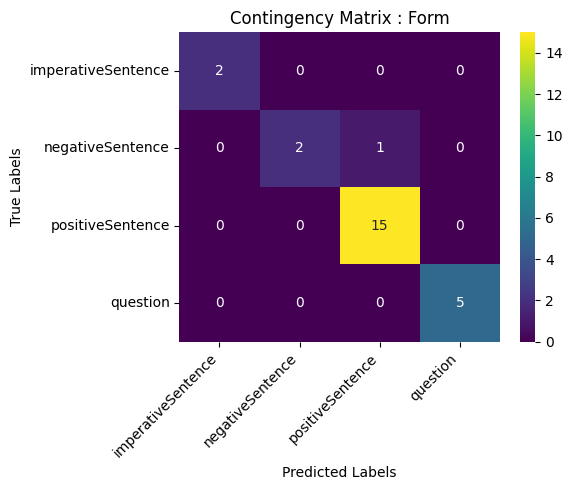

In [ ]:
matrix = contingency_matrix(annotated['forme'],notAnnotated['forme'])



# Create a DataFrame with labels
df = pd.DataFrame(
    matrix,
    index=np.unique(annotated['forme']),
    columns=np.unique(notAnnotated['forme'])
)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(df, annot=True, fmt="d", cmap="viridis", cbar=True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)  
plt.title("Contingency Matrix : Form")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.tight_layout()
plt.show()

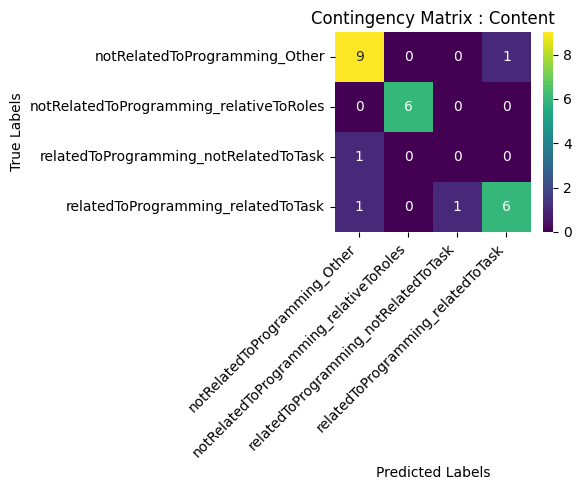

In [ ]:
matrix = contingency_matrix(annotated['content'],notAnnotated['content'])



# Create a DataFrame with labels
df = pd.DataFrame(
    matrix,
    index=np.unique(annotated['content']),
    columns=np.unique(notAnnotated['content'])
)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(df, annot=True, fmt="d", cmap="viridis", cbar=True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)  
plt.title("Contingency Matrix : Content")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.tight_layout()
plt.show()

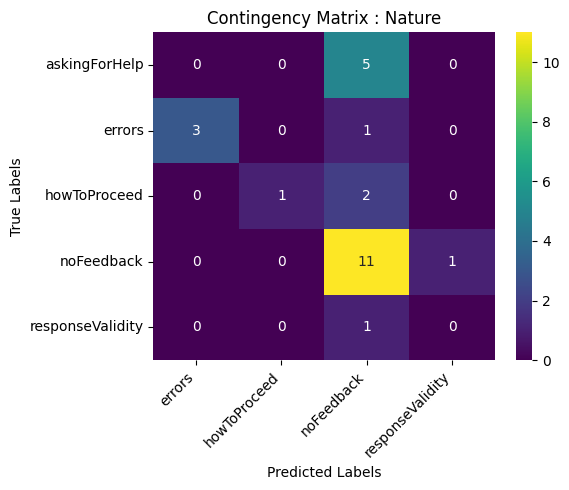

In [ ]:
matrix = contingency_matrix(annotated['nature'],notAnnotated['nature'])


# Create a DataFrame with labels
df = pd.DataFrame(
    matrix,
    index=np.unique(annotated['nature']),
    columns=np.unique(notAnnotated['nature'])
)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(df, annot=True, fmt="d", cmap="viridis", cbar=True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)  
plt.title("Contingency Matrix : Nature")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.tight_layout()
plt.show()

# Accord Mistral - OpenAI

In [80]:
tutoiement_df = pd.read_csv("annotation_mistral_conv_0_to_5.csv",encoding='latin-1',index_col = 0)
english_df = pd.read_csv("annotation_openai_conv_0_to_5.csv",encoding='latin-1',index_col=0)

In [81]:
tutoiement_df.head()

,seance_ID,groupe_ID,role,messageID,utterance_num,message,forme,ton,content,nature
0,1,0,Navigator,0,0,Tu es qui ?,question,positiveTone,notRelatedToProgramming_Other,askingForHelp
1,1,0,Navigator,1,0,On se met 5 partout ok ?,positiveSentence,positiveTone,notRelatedToProgramming_Other,noFeedback
2,1,1,Driver,2,0,OpÃ©,positiveSentence,positiveTone,notRelatedToProgramming_Other,noFeedback
3,1,1,Driver,3,0,OpÃ© lmkt,positiveSentence,positiveTone,notRelatedToProgramming_Other,noFeedback
4,1,1,Navigator,4,0,A PAR SA LE COUZ,positiveSentence,positiveTone,notRelatedToProgramming_Other,noFeedback


In [82]:
english_df.head()

,seance_ID,groupe_ID,role,messageID,utterance_num,message,forme,ton,content,nature
0,1,0,Navigator,0,0,"Tu es qui ,",question,positiveTone,notRelatedToProgramming_Other,noFeedback
1,1,0,Navigator,1,0,On se met 5 partout ok ?,question,positiveTone,notRelatedToProgramming_Other,noFeedback
2,np.int64(1),np.int64(1),Driver,2,0,OpÃ©,positiveSentence,positiveTone,notRelatedToProgramming_Other,noFeedback
3,np.int64(1),np.int64(1),Driver,3,0,OpÃ© lmkt,positiveSentence,positiveTone,notRelatedToProgramming_Other,noFeedback
4,np.int64(1),np.int64(1),Navigator,4,0,A PAR SA LE COUZ,positiveSentence,positiveTone,notRelatedToProgramming_Other,noFeedback


In [83]:
cols = ['forme','ton','content','nature']
labels_annotation = {
    "forme" :["negativeSentence","imperativeSentence","question","positiveSentence"],
    "ton": ["negativeTone","positiveTone"],
    "content" : ["relatedToProgramming_relatedToTask","relatedToProgramming_notRelatedToTask",
                "notRelatedToProgramming_relativeToRoles","notRelatedToProgramming_Other"],
    "nature" : ["responseValidity", "motivationnalFeedback", "correctResponse","taskKnowledge",
                "conceptKnowledge", "howToProceed", "errors", "askingForHelp","noFeedback"]
}
scores = []
for col in cols:
    scores.append(cohen_kappa_score(tutoiement_df[col],english_df[col],labels=labels_annotation[col]))
scores   

[np.float64(0.5800446760982874),
 np.float64(0.0),
 np.float64(0.6645851917930419),
 np.float64(0.3642512077294686)]

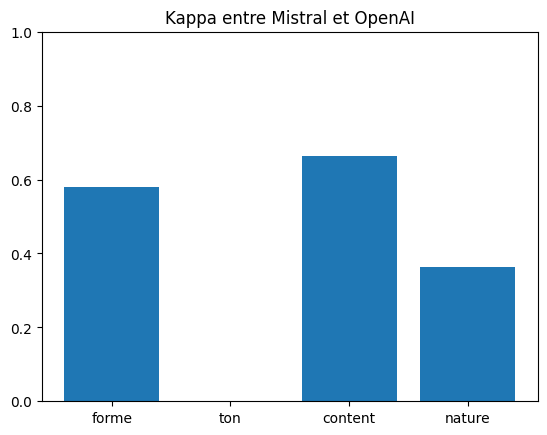

In [84]:
plt.bar(cols,scores)
plt.title("Kappa entre Mistral et OpenAI")
plt.ylim([0,1])
plt.show()

NameError: name 'mistral_df' is not defined

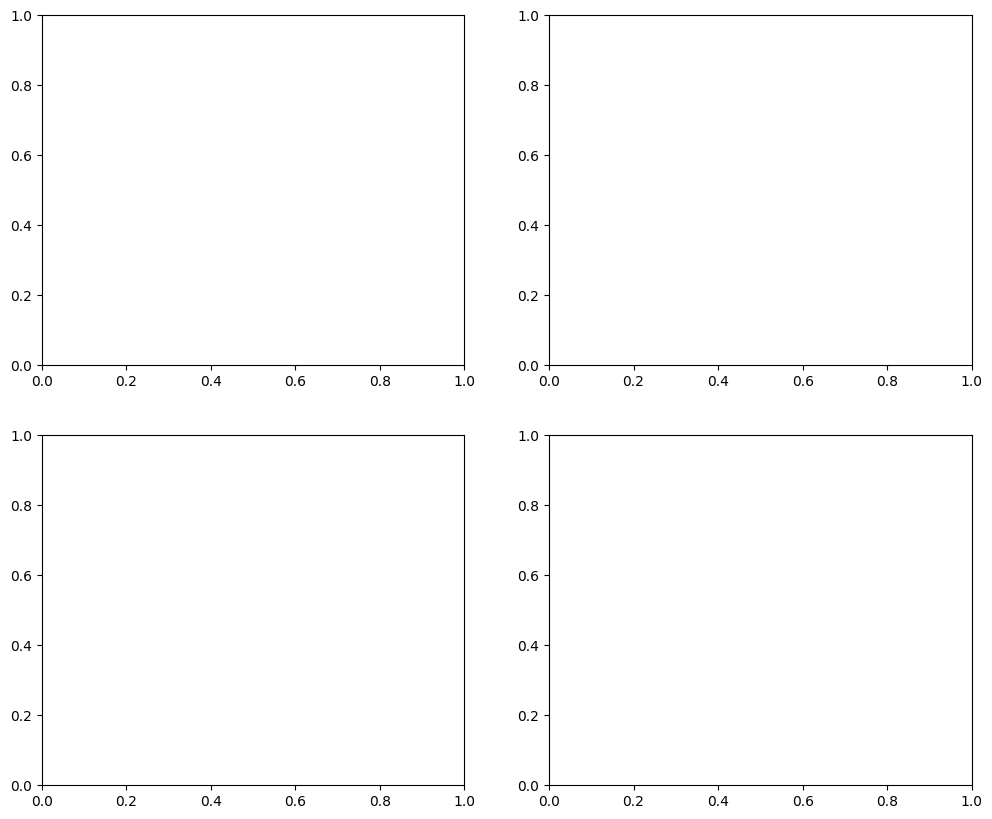

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.cluster import contingency_matrix

# Assume these are your columns of interest
columns = cols

# Determine subplot grid size (adjust as needed)
n_cols = 2
n_rows = int(np.ceil(len(columns) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
axes = axes.flatten()  # Flatten in case of single row/column

for i, col in enumerate(columns):
    matrix = contingency_matrix(mistral_df[col], openai_df[col])
    
    df = pd.DataFrame(
        matrix,
        index=np.unique(mistral_df[col]),
        columns=np.unique(openai_df[col])
    )

    sns.heatmap(df, annot=True, fmt="d", cmap="viridis", cbar=True, ax=axes[i])
    axes[i].set_title(f"Contingency Matrix: {col}")
    axes[i].set_xlabel("Open AI")
    axes[i].set_ylabel("Mistral")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].tick_params(axis='y', rotation=0)

# Turn off any extra axes (if number of columns is not a multiple of grid size)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Comparaisons Mistral-OpenAI : "+str(mistral_df.shape[0])+" messages", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


Impression que Mistral comprend mieux les subtilités : même train et test, mais pas de noFeedback à répétition ?

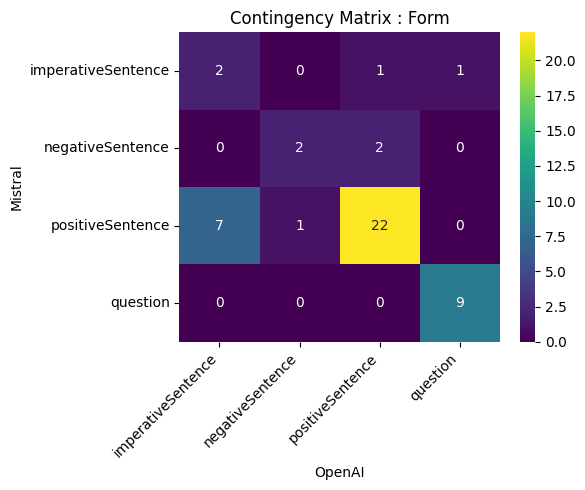

In [ ]:
matrix = contingency_matrix(mistral_df['forme'],openai_df['forme'])



# Create a DataFrame with labels
df = pd.DataFrame(
    matrix,
    index=np.unique(mistral_df['forme']),
    columns=np.unique(openai_df['forme'])
)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(df, annot=True, fmt="d", cmap="viridis", cbar=True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)  
plt.title("Contingency Matrix : Form")
plt.ylabel("Mistral")
plt.xlabel("OpenAI")
plt.tight_layout()
plt.show()

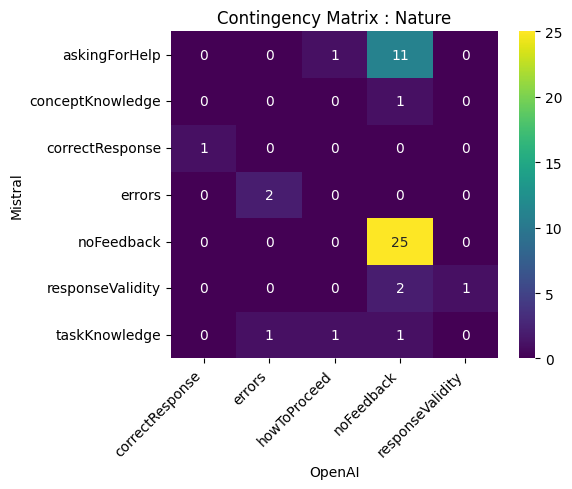

In [ ]:
matrix = contingency_matrix(mistral_df['nature'],openai_df['nature'])



# Create a DataFrame with labels
df = pd.DataFrame(
    matrix,
    index=np.unique(mistral_df['nature']),
    columns=np.unique(openai_df['nature'])
)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(df, annot=True, fmt="d", cmap="viridis", cbar=True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)  
plt.title("Contingency Matrix : Nature")
plt.ylabel("Mistral")
plt.xlabel("OpenAI")
plt.tight_layout()
plt.show()

# Comparaison prompting anglais - français openai

In [86]:
french_df = pd.read_csv("annotation_openai_conv_0_to_5_french_prompt.csv",encoding='latin-1',index_col = 0)
english_df = pd.read_csv("annotation_openai_conv_0_to_5.csv",encoding='latin-1',index_col=0)

In [87]:
french_df.head()

,seance_ID,groupe_ID,role,messageID,utterance_num,message,forme,ton,content,nature
0,np.int64(1),np.int64(0),Navigator,0,0,"Tu es qui ,",question,positiveTone,notRelatedToProgramming_Other,noFeedback
1,np.int64(1),np.int64(0),Navigator,1,0,On se met 5 partout ok ?,question,positiveTone,notRelatedToProgramming_Other,noFeedback
2,np.int64(1),np.int64(1),Driver,2,0,OpÃ©,positiveSentence,positiveTone,notRelatedToProgramming_Other,noFeedback
3,np.int64(1),np.int64(1),Driver,3,0,OpÃ© lmkt,positiveSentence,positiveTone,notRelatedToProgramming_Other,noFeedback
4,np.int64(1),np.int64(1),Navigator,4,0,A PAR SA LE COUZ,positiveSentence,positiveTone,notRelatedToProgramming_Other,noFeedback


In [88]:
english_df.head()

,seance_ID,groupe_ID,role,messageID,utterance_num,message,forme,ton,content,nature
0,1,0,Navigator,0,0,"Tu es qui ,",question,positiveTone,notRelatedToProgramming_Other,noFeedback
1,1,0,Navigator,1,0,On se met 5 partout ok ?,question,positiveTone,notRelatedToProgramming_Other,noFeedback
2,np.int64(1),np.int64(1),Driver,2,0,OpÃ©,positiveSentence,positiveTone,notRelatedToProgramming_Other,noFeedback
3,np.int64(1),np.int64(1),Driver,3,0,OpÃ© lmkt,positiveSentence,positiveTone,notRelatedToProgramming_Other,noFeedback
4,np.int64(1),np.int64(1),Navigator,4,0,A PAR SA LE COUZ,positiveSentence,positiveTone,notRelatedToProgramming_Other,noFeedback


In [89]:
cols = ['forme','ton','content','nature']
labels_annotation = {
    "forme" :["negativeSentence","imperativeSentence","question","positiveSentence"],
    "ton": ["negativeTone","positiveTone"],
    "content" : ["relatedToProgramming_relatedToTask","relatedToProgramming_notRelatedToTask",
                "notRelatedToProgramming_relativeToRoles","notRelatedToProgramming_Other"],
    "nature" : ["responseValidity", "motivationnalFeedback", "correctResponse","taskKnowledge",
                "conceptKnowledge", "howToProceed", "errors", "askingForHelp","noFeedback"]
}
scores = []
for col in cols:
    scores.append(cohen_kappa_score(french_df[col],english_df[col],labels=labels_annotation[col]))
scores   

c:\Users\cbd65\anaconda3\envs\jupyterenv\lib\site-packages\sklearn\metrics\_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


[np.float64(0.8909991742361685),
 np.float64(nan),
 np.float64(0.6907894736842106),
 np.float64(0.631083202511774)]

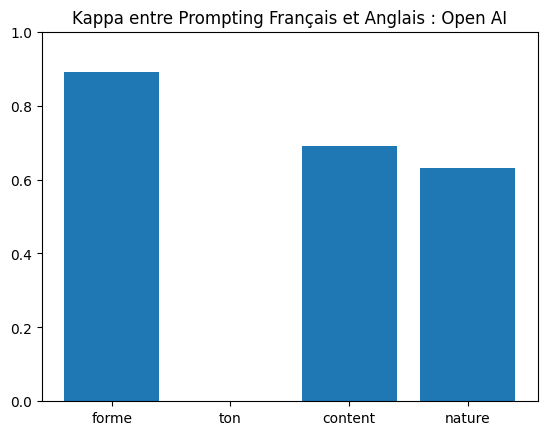

In [90]:
plt.bar(cols,scores)
plt.title("Kappa entre Prompting Français et Anglais : Open AI")
plt.ylim([0,1])
plt.show()

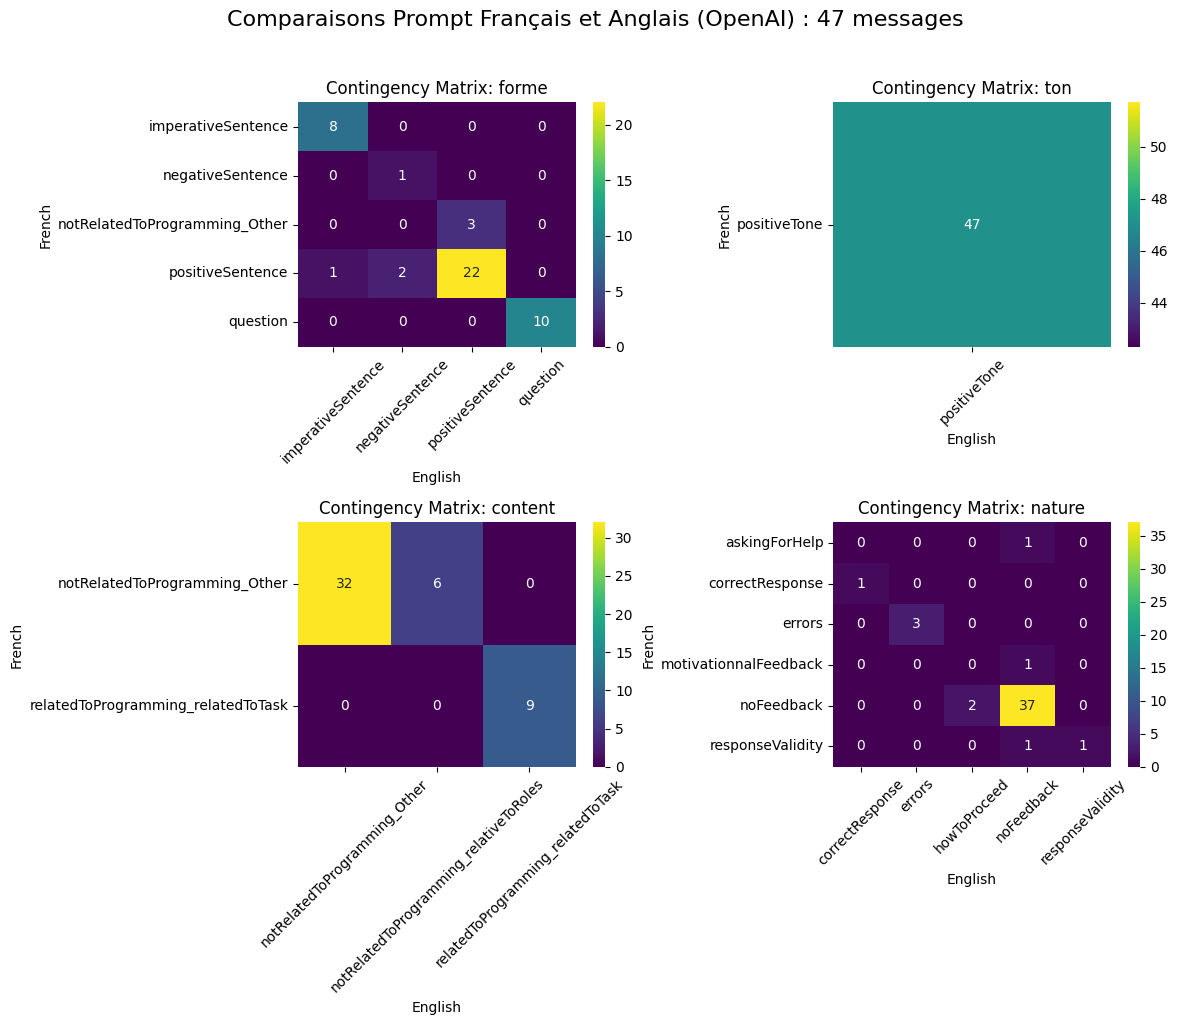

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.cluster import contingency_matrix

# Assume these are your columns of interest
columns = cols

# Determine subplot grid size (adjust as needed)
n_cols = 2
n_rows = int(np.ceil(len(columns) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
axes = axes.flatten()  # Flatten in case of single row/column

for i, col in enumerate(columns):
    matrix = contingency_matrix(french_df[col], english_df[col])
    
    df = pd.DataFrame(
        matrix,
        index=np.unique(french_df[col]),
        columns=np.unique(english_df[col])
    )

    sns.heatmap(df, annot=True, fmt="d", cmap="viridis", cbar=True, ax=axes[i])
    axes[i].set_title(f"Contingency Matrix: {col}")
    axes[i].set_xlabel("English")
    axes[i].set_ylabel("French")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].tick_params(axis='y', rotation=0)

# Turn off any extra axes (if number of columns is not a multiple of grid size)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Comparaisons Prompt Français et Anglais (OpenAI) : "+str(french_df.shape[0])+" messages", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [92]:
matrix = contingency_matrix(french_df[col], english_df[col])
    
df = pd.DataFrame(
    matrix,
    index=np.unique(french_df[col]),
    columns=np.unique(english_df[col])
)

sns.heatmap(df, annot=True, fmt="d", cmap="viridis", cbar=True, ax=axes[i])
axes[i].set_title(f"Contingency Matrix: {col}")
axes[i].set_xlabel("English")
axes[i].set_ylabel("French")
axes[i].tick_params(axis='x', rotation=45)
axes[i].tick_params(axis='y', rotation=0)

# Comparaison tutoiement - vouvoiement Mistral

In [93]:
tutoiement_df = pd.read_csv("annotation_mistral_conv_0_to_5.csv",encoding='latin-1',index_col = 0)
vouvoiement_df = pd.read_csv("annotation_mistral_vouvoiement_conv_0_to_5.csv",encoding='latin-1',index_col=0)

In [94]:
cols = ['forme','ton','content','nature']
labels_annotation = {
    "forme" :["negativeSentence","imperativeSentence","question","positiveSentence"],
    "ton": ["negativeTone","positiveTone"],
    "content" : ["relatedToProgramming_relatedToTask","relatedToProgramming_notRelatedToTask",
                "notRelatedToProgramming_relativeToRoles","notRelatedToProgramming_Other"],
    "nature" : ["responseValidity", "motivationnalFeedback", "correctResponse","taskKnowledge",
                "conceptKnowledge", "howToProceed", "errors", "askingForHelp","noFeedback"]
}
scores = []
for col in cols:
    scores.append(cohen_kappa_score(tutoiement_df[col],vouvoiement_df[col],labels=labels_annotation[col]))
scores   

[np.float64(1.0),
 np.float64(0.0),
 np.float64(0.8801020408163265),
 np.float64(0.8498402555910544)]

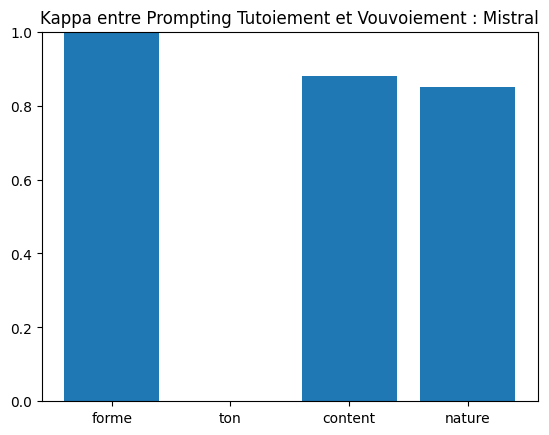

In [95]:
plt.bar(cols,scores)
plt.title("Kappa entre Prompting Tutoiement et Vouvoiement : Mistral")
plt.ylim([0,1])
plt.show()

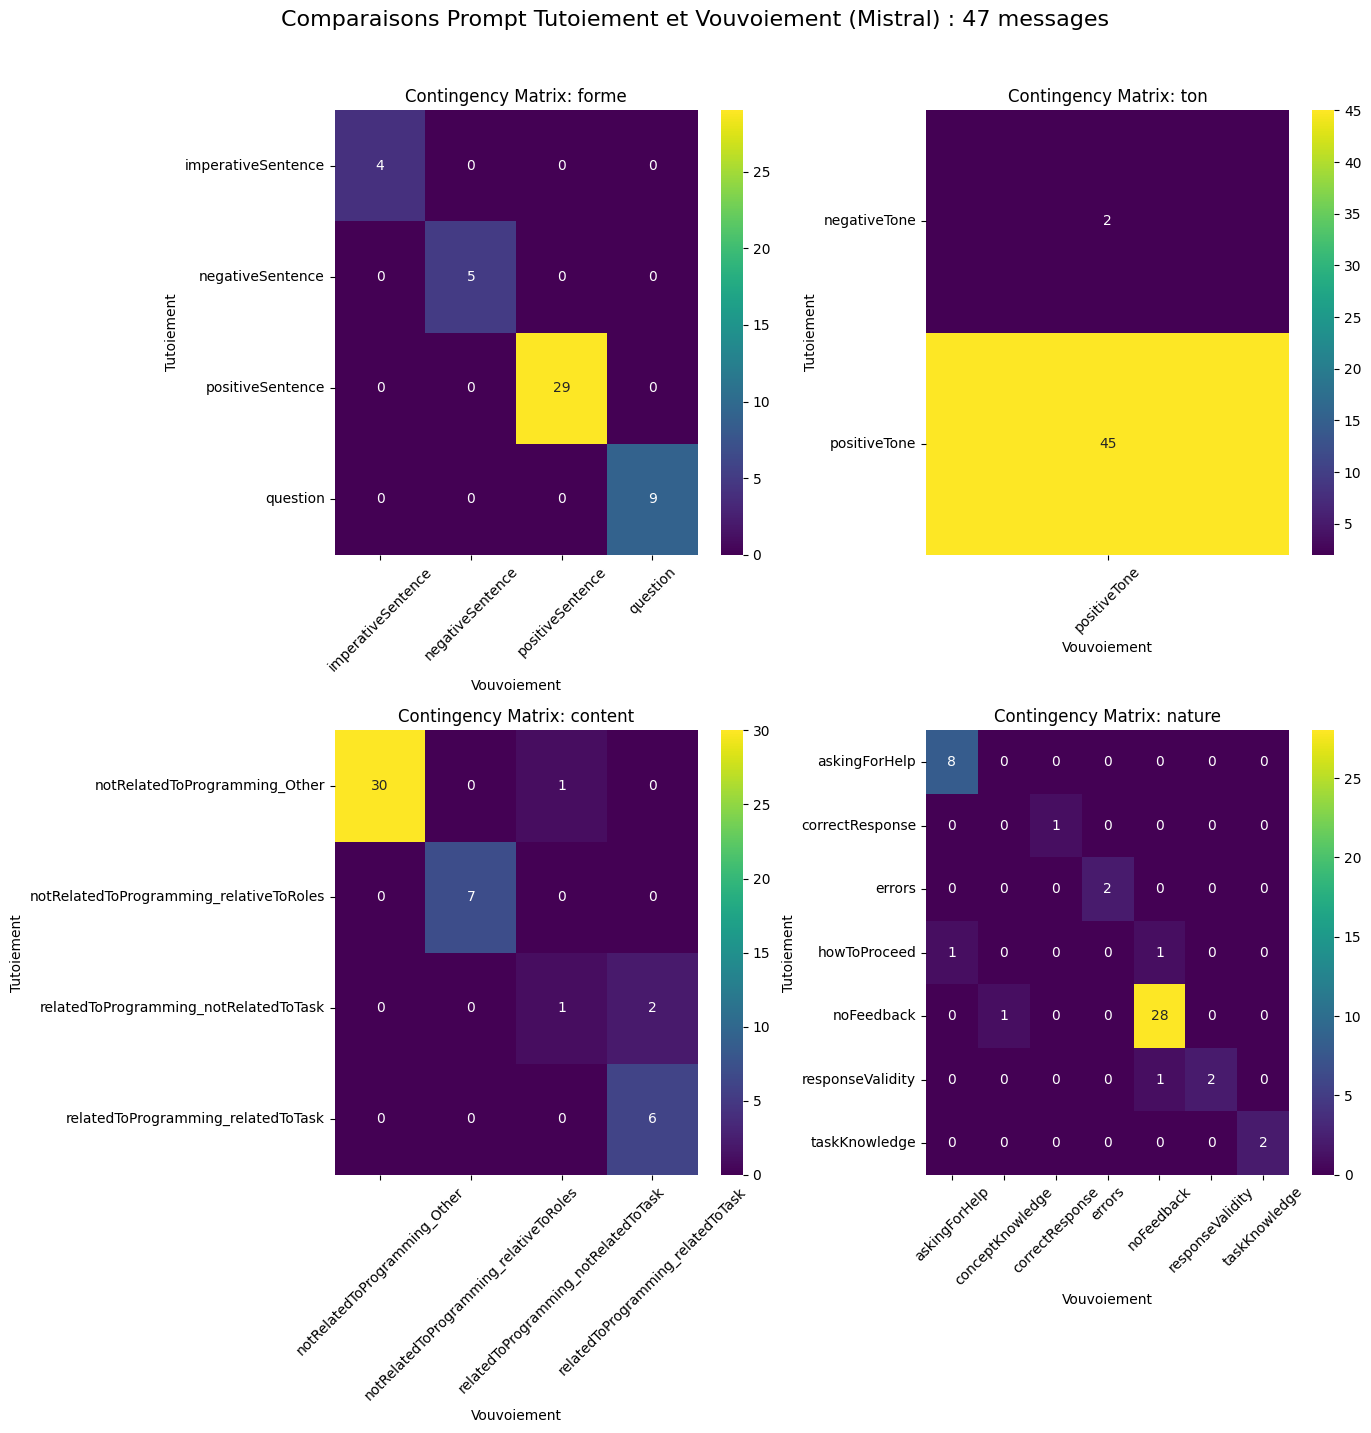

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.cluster import contingency_matrix

# Assume these are your columns of interest
columns = cols

# Determine subplot grid size (adjust as needed)
n_cols = 2
n_rows = int(np.ceil(len(columns) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 7))
axes = axes.flatten()  # Flatten in case of single row/column

for i, col in enumerate(columns):
    matrix = contingency_matrix(tutoiement_df[col], vouvoiement_df[col])
    
    df = pd.DataFrame(
        matrix,
        index=np.unique(tutoiement_df[col]),
        columns=np.unique(vouvoiement_df[col])
    )

    sns.heatmap(df, annot=True, fmt="d", cmap="viridis", cbar=True, ax=axes[i])
    axes[i].set_title(f"Contingency Matrix: {col}")
    axes[i].set_xlabel("Vouvoiement")
    axes[i].set_ylabel("Tutoiement")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].tick_params(axis='y', rotation=0)

# Turn off any extra axes (if number of columns is not a multiple of grid size)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Comparaisons Prompt Tutoiement et Vouvoiement (Mistral) : "+str(tutoiement_df.shape[0])+" messages", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
